In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.calibration import LabelEncoder
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv('jobs_in_data.csv')

# Divide the 'salary' column by 1000
data['salary'] /= 1000
data['salary_in_usd'] /= 1000


In [70]:
unique_locations = data['company_location'].unique()
# Placeholder GDP per capital values for each country (in USD)
country_gdp_per_capital = {
    'Germany': 52000,
    'United States': 65000,
    'United Kingdom': 48000,
    'Canada': 45000,
    'Spain': 38000,
    'Ireland': 65000,
    'South Africa': 6500,
    'Poland': 33000,
    'France': 42000,
    'Netherlands': 53000,
    'Luxembourg': 115000,
    'Lithuania': 32000,
    'Portugal': 29000,
    'Gibraltar': 89000,
    'Australia': 54000,
    'Colombia': 14800,
    'Ukraine': 9500,
    'Slovenia': 38000,
    'Romania': 13000,
    'Greece': 29000,
    'India': 2200,
    'Latvia': 32000,
    'Mauritius': 11000,
    'Russia': 11000,
    'Italy': 35000,
    'South Korea': 42000,
    'Estonia': 32000,
    'Czech Republic': 38000,
    'Brazil': 8900,
    'Qatar': 62000,
    'Kenya': 1800,
    'Denmark': 60000,
    'Ghana': 2200,
    'Sweden': 54000,
    'Turkey': 11000,
    'Switzerland': 83000,
    'Andorra': 49000,
    'Ecuador': 6600,
    'Mexico': 9900,
    'Israel': 42000,
    'Nigeria': 2400,
    'Saudi Arabia': 22000,
    'Argentina': 11600,
    'Japan': 42000,
    'Central African Republic': 700,
    'Finland': 53000,
    'Singapore': 65000,
    'Croatia': 27000,
    'Armenia': 4400,
    'Bosnia and Herzegovina': 11900,
    'Pakistan': 1600,
    'Iran': 6000,
    'Bahamas': 31000,
    'Austria': 54000,
    'Puerto Rico': 39100,
    'American Samoa': 14000,
    'Thailand': 7800,
    'Philippines': 3500,
    'Belgium': 51000,
    'Egypt': 3000,
    'Indonesia': 4400,
    'United Arab Emirates': 43000,
    'Malaysia': 13000,
    'Honduras': 2500,
    'Algeria': 4200,
    'Iraq': 5700,
    'China': 11000,
    'New Zealand': 44000,
    'Moldova': 3100,
    'Malta': 45000
}
# Define thresholds for GDP per capita (or any other criterion you choose)
high_income_threshold = 40000  # GDP per capita above this value will be considered first world
middle_income_threshold = 10000  # GDP per capita between this and high_income_threshold will be considered second world

# Create a dictionary to map country names to their corresponding development levels
development_levels = {}
for country in unique_locations:
    # Assign development levels based on GDP per capita
    if country in country_gdp_per_capital:
        if country_gdp_per_capital[country] > high_income_threshold:
            development_levels[country] = 'First World'
        elif country_gdp_per_capital[country] > middle_income_threshold:
            development_levels[country] = 'Second World'
        else:
            development_levels[country] = 'Third World'
    else:
        development_levels[country] = 'Data Not Available'  # Handle missing GDP per capita data

# Create a new column 'development_level' based on the assigned levels
data['development_level'] = data['company_location'].map(development_levels)


In [71]:
# Interaction Terms
data['work_year_experience'] = data['work_year'] * data['experience_level']
data['work_year_job_category'] = data['work_year'] * data['job_category']
data['salary_divide_dolar'] = data['salary_in_usd']/data['salary']

# Aggregate Statistics
agg_salary_by_job_category = data.groupby('job_category')['salary'].agg(['mean', 'median', 'std']).reset_index()
agg_salary_by_job_category.columns = ['job_category', 'avg_salary_job_category', 'median_salary_job_category', 'std_salary_job_category']
data = data.merge(agg_salary_by_job_category, on='job_category', how='left')

# Temporal Trends (if applicable)
agg_salary_by_year = data.groupby('work_year')['salary'].mean().reset_index()
agg_salary_by_year.columns = ['work_year', 'avg_salary_year']
data = data.merge(agg_salary_by_year, on='work_year', how='left')

In [72]:
# Encoding categorical variables into numerical values
label_encoder = LabelEncoder()
data['employment_type_encoded'] = label_encoder.fit_transform(data['employment_type'])
data['job_title_encoded'] = label_encoder.fit_transform(data['job_title'])

# Creating interaction features
data['employment_type_job_title'] = data['employment_type_encoded'] * data['job_title_encoded']

data['work_setting_encoded'] = label_encoder.fit_transform(data['work_setting'])
data['job_category_encoded'] = label_encoder.fit_transform(data['job_category'])

# Creating interaction features
data['work_setting_job_category'] = data['work_setting_encoded'] * data['job_category_encoded']

Epoch 1/100
211/211 [==============================] - 7s 26ms/step - loss: 12547.5918 - val_loss: 6969.8052
Epoch 2/100
211/211 [==============================] - 3s 14ms/step - loss: 4919.7183 - val_loss: 3917.6785
Epoch 3/100
211/211 [==============================] - 3s 14ms/step - loss: 3482.6304 - val_loss: 3251.8618
Epoch 4/100
211/211 [==============================] - 3s 14ms/step - loss: 3144.2432 - val_loss: 3128.1816
Epoch 5/100
211/211 [==============================] - 3s 14ms/step - loss: 3030.1062 - val_loss: 3053.2891
Epoch 6/100
211/211 [==============================] - 3s 14ms/step - loss: 2916.6501 - val_loss: 2960.6248
Epoch 7/100
211/211 [==============================] - 3s 14ms/step - loss: 2838.3376 - val_loss: 2966.5894
Epoch 8/100
211/211 [==============================] - 3s 15ms/step - loss: 2793.2009 - val_loss: 2853.0393
Epoch 9/100
211/211 [==============================] - 3s 14ms/step - loss: 2761.2175 - val_loss: 2844.9729
Epoch 10/100
211/211 [=====

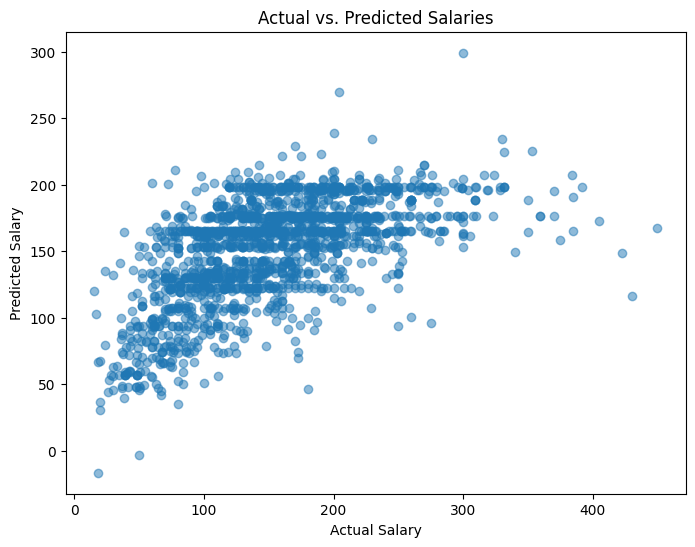

Mean Absolute Error: 39.64547381133767
Mean Squared Error: 2684.3245972136865
Root Mean Squared Error: 51.81046802735608


In [73]:
# Drop the 'salary_in_usd' column since we're ignoring it
# data.drop(columns=['salary_in_usd'], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data)

# Separate features and target
X = data.drop(columns=['salary', 'salary_in_usd'])
y = data['salary_in_usd']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for Conv1D
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model with Dropout layers
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(5),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print('Test Loss:', loss)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped).flatten()

# Visualize Predictions vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

# # Define thresholds for classification
# threshold_positive = 100  # Define a suitable threshold based on your problem

# # Classify predictions into two categories based on the threshold
# y_test_class = (y_test >= threshold_positive)
# predictions_class = (predictions >= threshold_positive)

# # Compute confusion matrix
# conf_matrix = confusion_matrix(y_test_class, predictions_class)

# # Calculate accuracy, precision, and recall
# accuracy = accuracy_score(y_test_class, predictions_class)
# precision = precision_score(y_test_class, predictions_class)
# recall = recall_score(y_test_class, predictions_class)

# # Print confusion matrix
# print('Confusion Matrix:')
# print(conf_matrix)

# # Print accuracy, precision, and recall
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")

Mean Absolute Error: 39.019920233220354
Mean Squared Error: 2638.369287022722
Root Mean Squared Error: 51.36505900924014
Confusion Matrix:
[[ 155  228]
 [  40 1448]]
Accuracy: 0.8567610903260289
Precision: 0.863961813842482
Recall: 0.9731182795698925

In [74]:
from sklearn.metrics import r2_score
# Evaluate the model
y_pred = model.predict(X_test_reshaped)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, y_pred)
accuracy = np.round(r2 * 100, 2)
print("Accuracy:",accuracy)

59/59 [==============================] - 0s 7ms/step
RMSE: 51.81046802735608
Accuracy: 35.27
